In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, precision_score, recall_score 
from sklearn.datasets import make_blobs
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.datasets import make_classification

C:\Users\Vinicius\Miniconda3\envs\py3k\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
x, y = make_classification(n_samples=10000, n_classes=2, weights=[0.9,0.5], random_state=42)
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

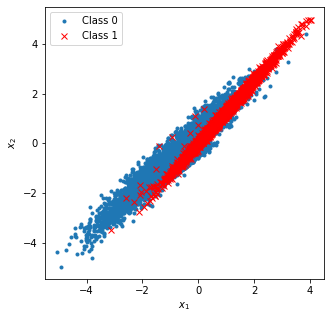

In [3]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('classes.png', dpi=600)
plt.show()

In [4]:
# Instantiate LogisticRegression object for multi-class case.
model = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='multinomial')

# Train model.
model.fit(x_train, y_train)

# Predict.
y_pred_log = model.predict(x_test)

# Getting the probabilities for each class.
y_prob_log = model.predict_proba(x_test)

# Binarize the test targets.
y_test_bin_log = label_binarize(y_test, classes=[0, 1, 2])

In [5]:
# Instantiate a Gaussian naive Bayes classifier.
gnb = GaussianNB()

# Train model.
gnb.fit(x_train, y_train)

# Predict.
y_pred_gnb = gnb.predict(x_test)

# Getting the probabilities for each class.
y_prob_gnb = gnb.predict_proba(x_test)

# Binarize the test targets.
y_test_bin_gnb = label_binarize(y_test, classes=[0, 1, 2])

In [6]:
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 5, 10, 15, 20]}]
knn = KNeighborsClassifier()

clf = GridSearchCV(knn, param_grid, cv=10, verbose=3, n_jobs=-1)
clf.fit(x, y)

print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min


{'n_neighbors': 15, 'weights': 'uniform'}
0.8836999999999999


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.3min finished


In [7]:
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn.fit(x_train, y_train)

# Predict.
y_pred_knn = knn.predict(x_test)

# Getting the probabilities for each class.
y_prob_knn = knn.predict_proba(x_test)

y_test_bin_knn = label_binarize(y_test, classes=[0, 1, 2])

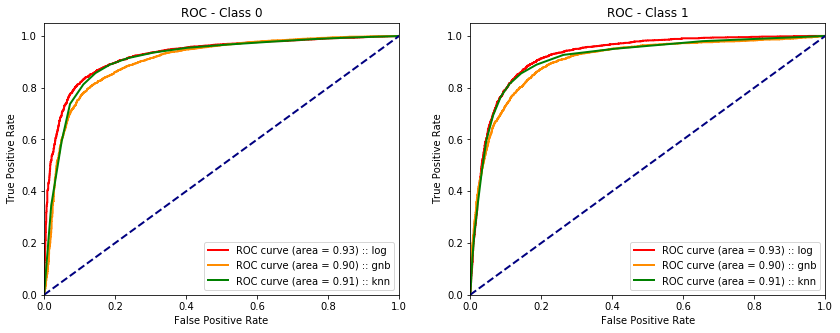

In [8]:
# Compute ROC curve and ROC area for each class.
fpr_gnb = dict()
tpr_gnb = dict()
fpr_log = dict()
tpr_log = dict()
fpr_knn = dict()
tpr_knn = dict()
roc_auc_gnb = dict()
roc_auc_log = dict()
roc_auc_knn = dict()
plt.figure(figsize=(14, 5))

lw = 2
for i in range(2):
    # Calculating ROC curve and ROC AUC.
    fpr_gnb[i], tpr_gnb[i], _ = roc_curve(y_test_bin_gnb[:, i], y_prob_gnb[:, i])
    roc_auc_gnb[i] = auc(fpr_gnb[i], tpr_gnb[i])
    
    fpr_log[i], tpr_log[i], _ = roc_curve(y_test_bin_log[:, i], y_prob_log[:, i])
    roc_auc_log[i] = auc(fpr_log[i], tpr_log[i])
    
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin_knn[:, i], y_prob_knn[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    
    # Plotting ROC curve for class i.
    ax = plt.subplot(1, 2, i + 1)
    plt.plot(fpr_log[i], tpr_log[i], color='red', lw=lw, label='ROC curve (area = %0.2f) :: log' % roc_auc_log[i])
    plt.plot(fpr_gnb[i], tpr_gnb[i], color='darkorange', lw=lw, label='ROC curve (area = %0.2f) :: gnb' % roc_auc_gnb[i])
    plt.plot(fpr_knn[i], tpr_knn[i], color='green', lw=lw, label='ROC curve (area = %0.2f) :: knn' % roc_auc_knn[i])
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - Class '+str(i))
    plt.legend(loc="lower right")

plt.show()